In [1]:
import os
import pickle
import csv
import numpy as np
from scipy.misc import imread
import shutil
import matplotlib.pyplot as plt

In [105]:
# read train.csv, return list of tuples (filename,whale_name)
def read_csv(file_name = "data/train.csv"):

    if not os.path.isfile(file_name):
        print("{} no valid path".format(file_name))
        return None
    
    csv_list = []
    with open(file_name) as csvfile:
        reader = csv.reader(csvfile)
        for rows in reader:
            csv_list.append((rows[0],rows[1]))

    return csv_list[1:]

# write list of tuples (filename,whale_name) to csv file
def write_csv(csv_list, file_name = "data/small_train.csv"):
    
    if os.path.isfile(file_name):
        os.remove(file_name)
    
    with open(file_name, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        writer.writerow(['Image'] + ['Id'])
        for entry in csv_list:
            writer.writerow([entry[0]] + [entry[1]])
            #spamwriter.writerow(['Spam'] * 5 + ['Baked Beans'])
            #spamwriter.writerow(['Spam', 'Lovely Spam', 'Wonderful Spam'])


# generate sorted list clustered by individuals: (name, number of images, array of indeces into train_list)
def get_whales(train_list):
    
    train_arr = np.asarray(train_list)
    whale_names = np.unique(train_arr.T[1], axis=0)

    whales = []
    for name in whale_names:
        idx = np.where(train_arr.T[1] == name)[0]
        whales.append((name,idx.shape[0],idx)) 

    # sort by frequency of occurence in descending order 
    whales.sort(key=lambda x:x[1], reverse=True)
    counts=[whale[1] for whale in whales]      # list of numbers of individuals ([34,25,24...])

    return whales, counts

def show_histogram(num = 100, file_name = "data/train.csv"):
    train_list = read_csv(file_name = file_name)
    _, counts = get_whales(train_list)    
    plt.hist(counts[1:num], bins=counts[1], color="b", align = "left", rwidth=0.75)  # skip first entry "new whale"
    # plt.hist(counts[1:num], bins=num)  # skip first entry "new whale"
    plt.title("{} most frequent whales".format(num))
    plt.xlabel('number of images per individual')
    plt.ylabel('number of individuals')
    plt.show()

    
def show_frequencies(num = 100, file_name = "data/train.csv"):
    train_list = read_csv(file_name = file_name)
    _, counts = get_whales(train_list)    
    num = min(num, len(counts)-1)   # avoid errors if num chosen larger than len(counts)
    plt.bar(np.arange(num),counts[1:num+1], color = 'b', edgecolor = 'b')
    plt.title("number of images per whale".format(num))
    plt.xlabel('individuals')
    plt.ylabel('number of images per individual')
    plt.show()

    
def plot_whales(imgs, labels=None, rows=4):
    
    figure = plt.figure(figsize=(16, 10))
    cols = len(imgs) // rows + 1
    
    for i, img in enumerate(imgs):    
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        plt.imshow(img, cmap='gray')              
        if len(labels)>0:
            subplot.set_title(labels[i], fontsize=16)
            
            
def show_whales(whale_no, folder="data/train", csv_file="data/train.csv",
                max_imgs=100, rows=4, labels=False):
    
    train_list = read_csv(file_name = csv_file)
    whales, counts = get_whales(train_list)   # get list of whales ordered by frequency    
    print("Images of whale {}, number {} in list".format(whales[whale_no][0], whale_no))

    img_count = min(counts[whale_no], max_imgs)

    imgs = []
    label_list = []
    idx = whales[whale_no][2]  
    for i in range(img_count):        
        fn = train_list[idx[i]][0]     # get filename out of train_csv list
        path = os.path.join(folder, fn)
        if os.path.isfile(path):
            imgs.append(plt.imread(path))
            if labels:
                label_list.append(whales[whale_no][0])
        else:
            print("invalid path: {}".format(path))
    
    plot_whales(imgs, labels=label_list, rows=rows)

           
# as a playground reproduce setting (image-files, csv-file, directory structure) 
# for small case (small number of selected individuals)
def create_small_case(sel_whales = [1,2,3],          # whales to be considered in case, by order of occurence
                      train_dir = "data/train",
                      train_csv = "data/train.csv",
                      small_dir = "data/small_train", 
                      small_csv = "data/small_train.csv"):

    if not os.path.isdir(train_dir):
        print("{} no valid directory".format(train_dir))
        return

    try: 
        shutil.rmtree(small_dir)   # remove directory, if already existing 
        print("old directory removed {}".format(small_dir))
    except:
        print("directory {} did not exist so far".format(small_dir))
    
    os.mkdir(small_dir)
    small_list=[]
    train_list = read_csv(file_name = train_csv)  # get list with (filenames, whalenames)
    whales, counts = get_whales(train_list)   # get list of whales ordered by frequency
    for i in sel_whales:                          
        # whale_idx = whales[i][2]                 # get list of indices of this whale
        print("copy {} images for whale # {} in ordered list, called {}"
              .format(whales[i][1], i, whales[i][0]))
        for idx in whales[i][2]:       # np array containing indices of this whale pointing into train_csv list  
            fn = train_list[idx][0]     # get filename out of train_csv list
            shutil.copy(os.path.join(train_dir, fn), 
                        os.path.join(small_dir, fn))
            
            small_list.append((fn,whales[i][0]))
    print("write csv file: {}".format(small_csv))            
    write_csv(small_list, small_csv)
                            

In [96]:
train_list = read_csv(file_name = "data/train.csv")
whales, counts = get_whales(train_list)
print("{} individuals".format(len(counts)))         

4251 individuals


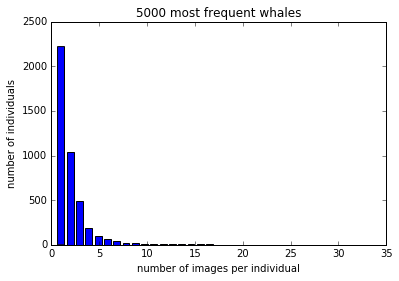

In [97]:
show_histogram(5000)

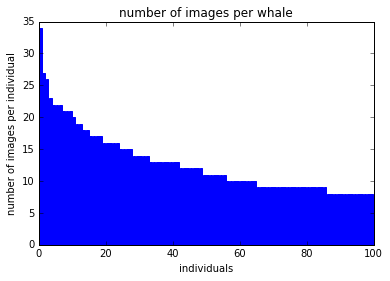

In [98]:
show_frequencies(100)

Images of whale w_7554f44, number 3 in list


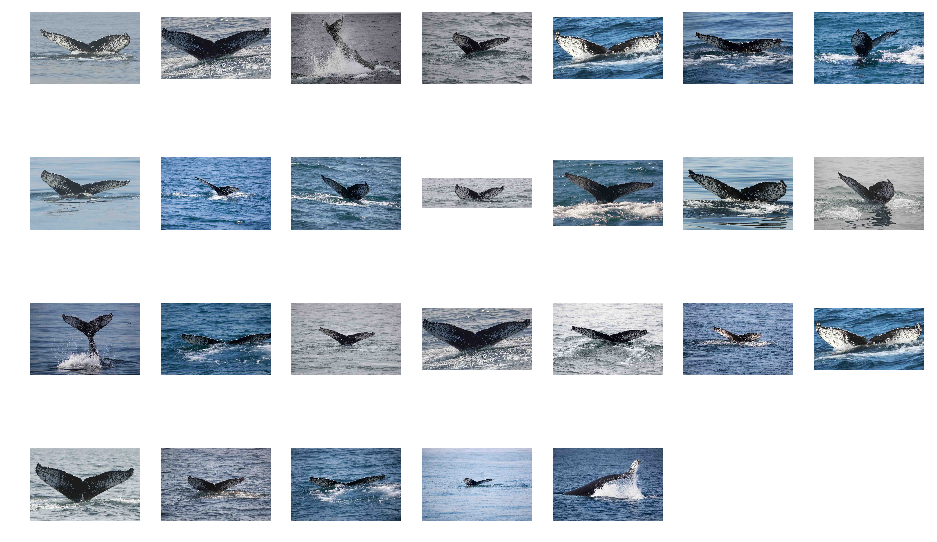

In [99]:
show_whales(3, max_imgs=50)

In [104]:
create_small_case(sel_whales = [1,3,5]) 

old directory removed data/small_train
copy 34 images for whale # 1 in ordered list, called w_1287fbc)
copy 26 images for whale # 3 in ordered list, called w_7554f44)
copy 22 images for whale # 5 in ordered list, called w_693c9ee)
write csv file: data/small_train.csv


In [37]:
train_list = read_csv(file_name = "data/small_train.csv")
whales, counts = get_whales(train_list)
print("{} individuals".format(len(counts)))
print(train_csv[0:3])

3 individuals
[('00022e1a.jpg', 'w_e15442c'), ('000466c4.jpg', 'w_1287fbc'), ('00087b01.jpg', 'w_da2efe0')]


In [8]:
# Deep learning lab course final project.
# Kaggle whale classification.

# Read jpeg images into numpy arrays.

# We cannot use this like this, the uncompressed files get too large!



def pickle_images(folder="data/train", outfile="data/train.pkl"):
    """Read jpeg images from folder and save in python format to
outfile. The format used is a pickled numpy array containing the
individual images as numpy arrays. """
    images = []
    files = os.listdir(folder)
    num_files = len(files)
    for i, fn in enumerate(files):
        file = os.path.join(folder, fn)
        print("Decompressing file {} of {}: {}".format(i, num_files, file))
        if os.path.isfile(file):
            images.append(imread(file))
    images = np.array(images)
    print("Saving in numpy/pickle format.")
    with open(outfile, "wb") as output:
        pickle.dump(images, output)
    print("Done reformatting images.")
    
    
def load_images(path="data/train.pkl"):
    with open("data/train.pkl", "rb") as infile: 
        return pickle.load(infile)

# pickle_images("data/train")
pickle_images("data/small_train")
gaga = load_images()
print(gaga[4].shape)

Decompressing file 0 of 8: data/small_train/0a6be385.jpg
Decompressing file 1 of 8: data/small_train/00a29f63.jpg
Decompressing file 2 of 8: data/small_train/0a4e0385.jpg
Decompressing file 3 of 8: data/small_train/0a5c0f48.jpg
Decompressing file 4 of 8: data/small_train/0a29c0d2.jpg
Decompressing file 5 of 8: data/small_train/0a3dbc55.jpg
Decompressing file 6 of 8: data/small_train/0a22ee49.jpg
Decompressing file 7 of 8: data/small_train/0a14e622.jpg
Saving in numpy/pickle format.
Done reformatting images.
(281, 1050, 3)


/home/jochen/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


In [9]:
# Deep learning lab course final project.  Kaggle whale
# classification.

# Build a tensorflow model according to the hyperparameters provided.

import tensorflow as tf
import csv

def extract_labels(path="data/train.csv"):
    """Extract image labels from csv and return as {file_name: whale_name}
dict."""
    with open(path) as csvfile:
        reader = csv.reader(csvfile)
        mydict = {rows[0]:rows[1] for rows in reader}
    return mydict

def build_model(features, labels, mode, params):
    """Returns an EstimatorSpec for the model described by the
hyperparameters. This is the model_fn as in
https://www.tensorflow.org/tutorials/layers#building_the_cnn_mnist_classifier

    """
    # layers_list is a list of the form (pool/conv/dense, filters,
    # size, units, activation)

    
    # unpack parameters
    layers_list = params["layers_list"]
    optimizer = params["optimizer"]
    optimizer_params = params["optimizer_params"]
    n_classes = params["n_classes"]
    image_x = params["image_x"]
    image_y = params["image_y"]
    
    input_layer = tf.reshape(features, [-1, image_x, image_y, 1])   # ? Batch size is Hyperparam (see tutorial)
    # labels = tf.placeholder(tf.float32)

    layers = [input_layer]  # tf layers
    # add layers according to the descriptions 
    for description in layers_list:
        type, filters, size, units, activation = description
        if type == "pool":
            layer = tf.layers.max_pooling2d(inputs=layers[-1],  
                                            pool_size=[size, size],
                                            strides=size,   # same size ?
                                            padding="valid")
        elif type == "conv":
            layer = tf.layers.conv2d(inputs=layers[-1],
                                     filters=filters,
                                     kernel_size=[size, size],
                                     padding="same",   # is this always good ?
                                     activation=activation)
        elif type == "dense":
            layer = tf.layers.dense(inputs=layers[-1],
                                    units=units,
                                    activation=activation)
        elif type == "flatten":  # ? flatten to be applied automatically each time a dens layer follows a conv. layer
            layer = tf.contrib.layers.flatten(inputs=layers[-1])    # not randomly / arbitrarily (no Hyperparam)
            
        layers.append(layer)

    # add softmax output layer
    output = tf.layers.dense(inputs=layers[-1], units=n_classes)   # more than one dense layer possible ?
    classes = tf.argmax(input=output, axis=1)
    softmax = tf.nn.softmax(output, name="softmax_output")

    predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
     "classes": classes,
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": softmax
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # one-hot encoding and cross entropy loss
    onehot_labels = tf.one_hot(indices=tf.cast(labels, tf.int32), depth=n_classes)
    loss = tf.losses.softmax_cross_entropy(
        onehot_labels=onehot_labels, logits=output)    

    correct_prediction = tf.equal(classes, tf.cast(labels, dtype=tf.int64))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        if optimizer == "SGD":
            learning_rate, = optimizer_params
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            train_op = optimizer.minimize(
                loss=loss,
                global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    if mode == tf.estimator.ModeKeys.EVAL:
        eval_metric_ops = { "accuracy":
                            tf.metrics.accuracy(labels=labels,
                                                predictions=classes)}
        return tf.estimator.EstimatorSpec(
            mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [6]:
# Test the model builder on an MNIST architecture.

import tensorflow as tf
import os, gzip
import pickle as cPickle
from cnn import build_model

def mnist(datasets_dir='./data/mnist'):
    """Download MNIST data set. (course repo)."""
    if not os.path.exists(datasets_dir):
        os.mkdir(datasets_dir)
    data_file = os.path.join(datasets_dir, 'mnist.pkl.gz')
    if not os.path.exists(data_file):
        print('... downloading MNIST from the web')
        try:
            import urllib
            urllib.urlretrieve('http://google.com')
        except AttributeError:
            import urllib.request as urllib
        url = 'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        urllib.urlretrieve(url, data_file)

    print('... loading data')
    # Load the dataset
    f = gzip.open(data_file, 'rb')
    try:
        train_set, valid_set, test_set = cPickle.load(f, encoding="latin1")
    except TypeError:
        train_set, valid_set, test_set = cPickle.load(f)
    f.close()

    test_x, test_y = test_set
    test_x = test_x.astype('float32')
    test_x = test_x.astype('float32').reshape(test_x.shape[0], 1, 28, 28)
    test_y = test_y.astype('int32')
    valid_x, valid_y = valid_set
    valid_x = valid_x.astype('float32')
    valid_x = valid_x.astype('float32').reshape(valid_x.shape[0], 1, 28, 28)
    valid_y = valid_y.astype('int32')
    train_x, train_y = train_set
    train_x = train_x.astype('float32').reshape(train_x.shape[0], 1, 28, 28)
    train_y = train_y.astype('int32')
    rval = [(train_x, train_y), (valid_x, valid_y), (test_x, test_y)]
    print('... done loading data')
    return rval


def build_model_test(from_scratch = True):
    # model specifications according to Fabian's lab course assignment 2:
    layers = [      # type, filters, size, units, activation = description
        ("conv", 16, 3, None, tf.nn.relu),   
        ("pool", None, 2, None, None),
        ("conv", 16, 3, None, tf.nn.relu),
        ("pool", None, 2, None, None),
        ("flatten", None, None, None, None),
        ("dense", None, None, 128, tf.nn.relu)        
    ]

    params = {"layers_list": layers,
              "optimizer": "SGD",
              "optimizer_params": (0.1,),    # learning rate - set from 0.001 to 0.1
              "n_classes": 10,
              "image_x": 28,
              "image_y": 28}
    
    if from_scratch:
        try: 
            shutil.rmtree("tmp/mnist_model4")   # remove directory with stored parameters from previous runs    
        except:
            print("file tmp/mnist_model3 does not exist")
        
    mnist_classifier = tf.estimator.Estimator(
        model_fn=build_model,
        model_dir="tmp/mnist_model3",
        params=params)

#    mnist_classifier = tf.estimator.Estimator(
#        model_fn=build_model,
#        model_dir="tmp/mnist_model3")
        
    
    
    
    '''
    train_data = tf.convert_to_tensor(mnist()[0][0])
    train_labels = np.asarray(tf.convert_to_tensor(mnist()[0][1]))
    eval_data = tf.convert_to_tensor(mnist()[1][0])
    eval_labels = np.asarray(tf.convert_to_tensor(mnist()[1][1]))
    '''

    # load data and feed in Tensors for images and labels
    mnist = tf.contrib.learn.datasets.load_dataset("mnist")
    train_data = mnist.train.images  # Returns np.array
    train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
    eval_data = mnist.test.images  # Returns np.array
    eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)    
    
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": train_data},
      y=train_labels,
      batch_size=50,   # 100
      num_epochs=None,
      shuffle=True)
    
    mnist_classifier.train(
      input_fn=train_input_fn,
      steps=10)    

    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
      x={"x": eval_data},
      y=eval_labels,
      num_epochs=1,
      shuffle=False)

    eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
    print(eval_results)
    
    '''    
    train_data = mnist()[0]
    batch_size = 50
    def input_fn():
        batch_count = input_fn.batch_count
        featureBatch = train_data[0][batch_count*batch_size:(batch_count+1)*batch_size]
        labelBatch = train_data[1][batch_count*batch_size:(batch_count+1)*batch_size]
        input_fn.batch_count += 1
        print("input_fn here, batch_count is now", input_fn.batch_count)
        return (featureBatch, labelBatch)
    input_fn.batch_count = 0
    mnist_classifier.train(input_fn=input_fn, steps=800)
    print("done training. evaluating:")

    input_fn = lambda: (train_data[0][:3000], train_data[1][:3000])
    res= mnist_classifier.evaluate(input_fn=input_fn, steps=5)
    print(res)
    '''                           

build_model_test()

file tmp/mnist_model3 does not exist
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_save_checkpoints_steps': None, '_num_ps_replicas': 0, '_session_config': None, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3e1cfdd828>, '_task_id': 0, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_task_type': 'worker', '_master': '', '_model_dir': 'tmp/mnist_model3'}
Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


TypeError: Failed to convert object of type <class 'dict'> to Tensor. Contents: {'x': <tf.Tensor 'random_shuffle_queue_DequeueMany:1' shape=(50, 784) dtype=float32>}. Consider casting elements to a supported type.